# What Tests to write with Python?

Unit and Integration:
       
       functions, modules, class, method, package

Functional and E2E:
      
      often black box testing of ready product upon requirements, specs, user guides

# Fuctional Testing techniques

1.	DYNAMIC    CATEGORIES

1.1. based on spec (black box)

    1.1.1. equivalent partitioning (for x <=2, for 2<x<=5…..)
    1.1.2. boundary values
    1.1.3. decision tables (таблицы истиности: yes+ yes+ no criteries = result)
    1.1.4. state transitioning (state:off -> action -> state:on)
    1.1.5. end user customer scenarios (use cases)

1.2 based on structure (white box)

    1.2.1 component (integration between modules)
    1.2.2. operators coverage (checked operators) - pick testing / tests which imply using of as much operands as possible (to decrease the amount of the tests to run )
    1.2.3. тестирования потока управления (if conditions)

1.3. based on experience

    1.3.1 предположения об ошибках (based on the list of the defects from previous reslases possibly)
    1.3.2 исследовательское тестирование (when the specs are not that clear)


2.	STATIC:     reviews of the docs, code conventions


# Layers of Test automation 
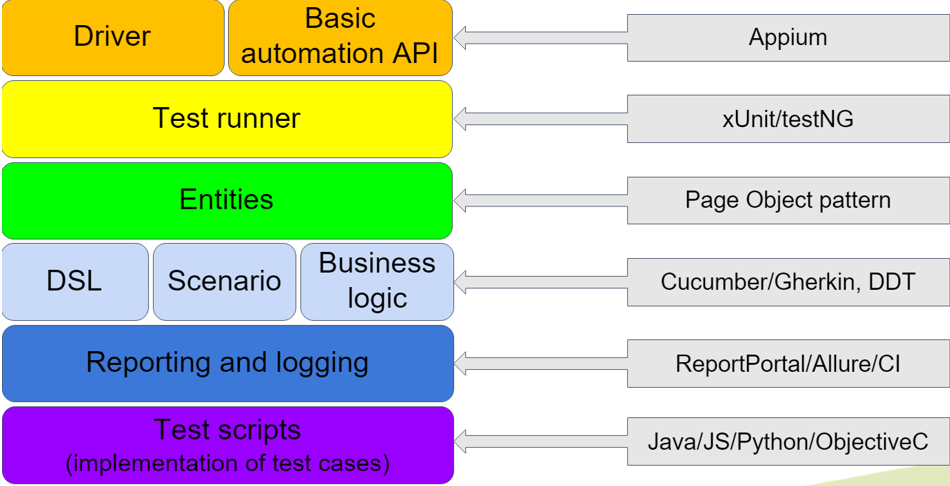


# Test runner's features we often look forward/investigate

1. Structure(tests structure, naming, cache files, config files)
2. Launcher (run parameters)
3. Test fixture preparation (setup and teardown)
    -	Scopes
    -	Parameters
4. Parametrize tests
5. Asserts/verifications
6. Reporting
7. Useful features of the runner  (marks/tags, mocks)
8. Supporting of popular methodologies (data-driven testing, Business-driven testing, keyword-driven testing)
9. Plugins
10. Concurrent execution


Lets inspect:
     
    Unittest
    
    Pytest
    
    Robotframework

# Test case structure 
1.	Arrange
   - setup test environment, fixtures
2.	Act
   - no if operators
   - no for loops, straightforward actions for better readability and reporting
   - do not mix too many actions, do not try to test everything with one test case
3.	Assert
   - do not assert too many things, target some particular related things by asserts
4.	Cleanup

Tests are supposed to be:

    independent, one test does not affect others
    informative, you can understand a case covered by the test
    conventions of writing test case / no ifs, access by indexes etc.


# Unittest
https://docs.python.org/3/library/unittest.html

prototype is JUnit

Tests can be run from the module under test, but preferably to be run from the separate file

Test cases should start with test_...py


In [28]:
import unittest
print('\n'.join([content for content in dir(unittest) if not content.startswith('_')]))

BaseTestSuite
FunctionTestCase
IsolatedAsyncioTestCase
SkipTest
TestCase
TestLoader
TestProgram
TestResult
TestSuite
TextTestResult
TextTestRunner
addModuleCleanup
async_case
case
defaultTestLoader
expectedFailure
findTestCases
getTestCaseNames
installHandler
load_tests
loader
main
makeSuite
registerResult
removeHandler
removeResult
result
runner
signals
skip
skipIf
skipUnless
suite
util


In [35]:
import unittest

class DefaultTestCase(unittest.TestCase):

    def setUp(self):
        print("running fixture. setup something")
        self.a = 10
        

    def tearDown(self):
        print("running fixture tear down")

    @classmethod
    def setUpClass(cls):
        print("running class fixture setup")

    @classmethod
    def tearDownClass(cls):
        print("running class fixture teardown")


    def test_default_widget_size(self):
        print("running test")
        self.b = 10
        self.assertEqual(self.a, self.b, "broken")
        
    def test_second_test(self):
        print("running second test")
        c = 20
        self.assertEqual(self.a, c, f"{self.a} does not equal {c}")
        
    @unittest.skip("reason")    
    def  test_smth(self):
        print("this should not be printed since skipped")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.Fs

running class fixture setup
running fixture. setup something
running test
running fixture tear down
running fixture. setup something
running second test
running fixture tear down
running class fixture teardown



FAIL: test_second_test (__main__.DefaultWidgetSizeTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-35-e539886d4823>", line 30, in test_second_test
    self.assertEqual(self.a, c, f"{self.a} does not equal {c}")
AssertionError: 10 != 20 : 10 does not equal 20

----------------------------------------------------------------------
Ran 3 tests in 0.004s

FAILED (failures=1, skipped=1)


In [ ]:
# If you want to organize tests into test suites, based on features 

def suite():
    suite = unittest.TestSuite()
    suite.addTest(MyTestCase('test_default_widget_size'))  # tests from the 'TestCase' class
    suite.addTest(MyTestCase('test_widget_resize'))
    return suite

if __name__ == '__main__':
    runner = unittest.TextTestRunner()
    runner.run(suite())


In [ ]:
# If you have old test cases spread amongst different modules/fiels

testcase = unittest.FunctionTestCase(testSomething,
                                     setUp=makeSomethingDB,
                                     tearDown=deleteSomethingDB)

# Running via cmd line
python -m unittest test_module.TestClass.test_method

In [16]:
!python -m unittest --help

usage: python.exe -m unittest [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                              [-k TESTNAMEPATTERNS]
                              [tests [tests ...]]

positional arguments:
  tests                a list of any number of test modules, classes and test
                       methods.

optional arguments:
  -h, --help           show this help message and exit
  -v, --verbose        Verbose output
  -q, --quiet          Quiet output
  --locals             Show local variables in tracebacks
  -f, --failfast       Stop on first fail or error
  -c, --catch          Catch Ctrl-C and display results so far
  -b, --buffer         Buffer stdout and stderr during tests
  -k TESTNAMEPATTERNS  Only run tests which match the given substring

Examples:
  python.exe -m unittest test_module               - run tests from test_module
  python.exe -m unittest module.TestClass          - run tests from module.TestClass
  python.exe -m unittest module.Class.test_method  - run specifie

In [27]:
import unittest
print('\n'.join([content for content in dir(unittest.TestCase) if not content.startswith('_')]))

addClassCleanup
addCleanup
addTypeEqualityFunc
assertAlmostEqual
assertAlmostEquals
assertCountEqual
assertDictContainsSubset
assertDictEqual
assertEqual
assertEquals
assertFalse
assertGreater
assertGreaterEqual
assertIn
assertIs
assertIsInstance
assertIsNone
assertIsNot
assertIsNotNone
assertLess
assertLessEqual
assertListEqual
assertLogs
assertMultiLineEqual
assertNotAlmostEqual
assertNotAlmostEquals
assertNotEqual
assertNotEquals
assertNotIn
assertNotIsInstance
assertNotRegex
assertNotRegexpMatches
assertRaises
assertRaisesRegex
assertRaisesRegexp
assertRegex
assertRegexpMatches
assertSequenceEqual
assertSetEqual
assertTrue
assertTupleEqual
assertWarns
assertWarnsRegex
assert_
countTestCases
debug
defaultTestResult
doClassCleanups
doCleanups
fail
failIf
failIfAlmostEqual
failIfEqual
failUnless
failUnlessAlmostEqual
failUnlessEqual
failUnlessRaises
failureException
id
longMessage
maxDiff
run
setUp
setUpClass
shortDescription
skipTest
subTest
tearDown
tearDownClass


# Reports

no built-in mechanism to create xml reports

use 3rd patry libs to create xml or html  (pytest-html, pytest --xml- , unittest-xml-reporting, HTMLTestRunner)

use unittest.TextTestRunner and unittest.TestResult to override some of the deafut unittest behaviour:

    - Make a class that inherits from unittest.TestResult (say, MyResults)
    - Then make a class that inherits from unittest.TextTestRunner (say, MyRunner) and override _makeResult() to return an instance of MyResults.
    - Then, construct a test suite (which you've probably already got working), and call MyRunner().run(suite).
      You can put whatever behavior you like, including colors, into MyResults





# Design mocks with unittest.mock
https://docs.python.org/3/library/unittest.mock.html

Mock(), Mock(side_effect=), patch(), MagicMock()

- simulate any Python object

- creates attribs on the fly, method can receive any number of args 

- return of the mocked method is mock object

- assertion functions for Mock objects to inspect the arguments passed to the mocked method (control of the mocked object) and to verify program used an object as you expected

- specify a function’s return value to control code behaviour during the test

- configure a Mock to set up some of the object’s behaviors with method .configure_mock(). Some configurable members include .side_effect, .return_value, and .name



# Data-driven and test or fixtures parametrization are not supported out of the box in unittest


# PYTEST
https://docs.pytest.org/en/stable/contents.html
- 3rd party
- flexible test setup/teardown design
- ability to use hooks and create plugins
- lot of already developed plugins to facilitate various use cases

Run it via cmd line or may call it from the file with tests and it will:
- In the directory, search for test_*.py or *_test.py files, imported by their test package name.

- From those files, collect test items:

test prefixed test functions or methods outside of class

test prefixed test functions or methods inside Test prefixed test classes (without an __init__ method)

discovers unittest test cases too

- potentially you can customize your deafault test discovery using hooks



In [26]:
import pytest
print('\n'.join([content for content in dir(pytest) if not content.startswith('_')]))

Class
Collector
ExitCode
File
FixtureLookupError
Function
Instance
Item
Module
Package
PytestAssertRewriteWarning
PytestCacheWarning
PytestCollectionWarning
PytestConfigWarning
PytestDeprecationWarning
PytestExperimentalApiWarning
PytestUnhandledCoroutineWarning
PytestUnknownMarkWarning
PytestWarning
Session
UsageError
approx
cmdline
collect
console_main
deprecated_call
exit
fail
fixture
freeze_includes
hookimpl
hookspec
importorskip
main
mark
param
raises
register_assert_rewrite
set_trace
skip
warns
xfail
yield_fixture


In [21]:
!python -m pytest --help

                        log date format as used by the logging module.
  --log-cli-level=LOG_CLI_LEVEL
                        cli logging level.
  --log-cli-format=LOG_CLI_FORMAT
                        log format as used by the logging module.
  --log-cli-date-format=LOG_CLI_DATE_FORMAT
                        log date format as used by the logging module.
  --log-file=LOG_FILE   path to a file when logging will be written to.
  --log-file-level=LOG_FILE_LEVEL
                        log file logging level.
  --log-file-format=LOG_FILE_FORMAT
                        log format as used by the logging module.
  --log-file-date-format=LOG_FILE_DATE_FORMAT
                        log date format as used by the logging module.
  --log-auto-indent=LOG_AUTO_INDENT
                        Auto-indent multiline messages passed to the logging
                        module. Accepts true|on, false|off or an integer.

[pytest] ini-options in the first pytest.ini|tox.ini|setup.cfg file found:

  

# Running tests

pytest.main(["-x", "mytestdir"])

pytest -q test_class.py

pytest -m slow
(by marker)


# Test setup and teardown 

# Fixtures = 
- functions
- contain teardown part in them
- are defined using the @pytest.fixture decorator
- built-in fixtures
- can get the context of the test (request object)
- can be parametrised
- can receive other fixture (dependencies)
- have scopes: module, class, function, session, package, + autouse, conftest.py

function: the default scope, the fixture is destroyed at the end of the test

class: the fixture is destroyed during teardown of the last test in the class

module: the fixture is destroyed during teardown of the last test in the module

package: the fixture is destroyed during teardown of the last test in the package

session: the fixture is destroyed at the end of the test session


In [ ]:
import pytest

import winrm  # 3rd party
import paramiko  # 3rd party

# https://docs.pytest.org/en/stable/reference.html#id90

# fixture factory technique
@pytest.fixture(scope="function")  # define scope
def connector(request):  # object in pytest connecting to the test context
    def _connector(ip, user, os_type, key_path=None, pwd=None, domain=None):  # these parameters can now be passed right in the test
        if os_type.lower() == 'windows':
            connection = winrm.Session(target=ip,
                                       auth=(user + '@' + domain, pwd),
                                       transport='ntlm', server_cert_validation='ignore')
        else:
            ssh = paramiko.SSHClient()
            ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
            connection = ssh.connect(ip, username=user, key_filename=key_path)
          
        
        def fin():
            connector.close()

        request.addfinalizer(fin)  # hooking up teadrown fuction to test context
        return connection

    yield _connector
   
    
       
    

def test_conenction_to_server(connector):
    new_conenction = connector('192.168.0.1', 'hadasah', 'windows', pwd='somepwd', domain='dummydomain')
    cmd_result = new_conenction('console cmd', 'parameters')  # this is just an example, not valid code actually
    assert cmd_result.code == 0

# Fixtures execution order
- dependencies
- scopes

In [ ]:
import pytest


@pytest.fixture
def order():
    return []


@pytest.fixture
def outer(order, inner):
    order.append("outer")


class TestOne:
    @pytest.fixture
    def inner(self, order):
        order.append("one")

    def test_order(self, order, outer):
        assert order == ["one", "outer"]


class TestTwo:
    @pytest.fixture
    def inner(self, order):
        order.append("two")

    def test_order(self, order, outer):
        assert order == ["two", "outer"]

In [ ]:
import pytest


@pytest.fixture(scope="session")
def order():
    return []


@pytest.fixture
def func(order):
    order.append("function")


@pytest.fixture(scope="class")
def cls(order):
    order.append("class")


@pytest.fixture(scope="module")
def mod(order):
    order.append("module")


@pytest.fixture(scope="package")
def pack(order):
    order.append("package")


@pytest.fixture(scope="session")
def sess(order):
    order.append("session")


class TestClass:
    def test_order(self, func, cls, mod, pack, sess, order):
        assert order == ["session", "package", "module", "class", "function"]
                  

# Assert

One of the main features of pytest is the use of plain assert statements and the detailed introspection of expressions upon assertion failures.

# 'Request' fixture
Fixture functions can accept the request object to introspect the “requesting” test function, class or module context.
Using the request object, a fixture can also access markers which are applied to a test function. This can be useful to pass data into a fixture from a test


In [ ]:
import pytest

# https://docs.pytest.org/en/stable/reference.html#id90
@pytest.fixture
def fixt(request):
    marker = request.node.get_closest_marker("fixt_data")
    if marker is None:
        # Handle missing marker in some way...
        data = None
    else:
        data = marker.args[0]

    # Do something with the data
    return data


@pytest.mark.fixt_data(42)
def test_fixt(fixt):
    assert fixt == 42

# Parametrize fixture

In [ ]:
import pytest
import smtplib


@pytest.fixture(scope="module", params=["smtp.gmail.com", "mail.python.org"])
def smtp_connection(request):
    smtp_connection = smtplib.SMTP(request.param, 587, timeout=5)
    yield smtp_connection
    print("finalizing {}".format(smtp_connection))
    smtp_connection.close()

# Parametrize test    
    
In case the values provided to parametrize result in an empty list - for example, if they’re dynamically generated by some function - the behaviour of pytest is defined by the empty_parameter_set_mark option. 

In [ ]:


# @pytest.mark.parametrize  applicable both on tests and test classes

permutations
@pytest.mark.parametrize("x", [0, 1])
@pytest.mark.parametrize("y", [2, 3])
def test_foo(x, y):
    pass
    
@pytest.mark.parametrize("test_input,expected", [("3+5", 8), ("2+4", 6), ("6*9", 42)])
def test_eval(test_input, expected):
    assert eval(test_input) == expected
    
    
@pytest.mark.parametrize(
    "test_input,expected",
    [("3+5", 8), ("2+4", 6), pytest.param("6*9", 42, marks=pytest.mark.xfail)],
)
def test_eval(test_input, expected):
    assert eval(test_input) == expected    
    
   

# Conftest.py, hooks and plugins
- conftest.py can be viewed as  a local plugin
- can setup hooks (using build-ins or new ones there)
- shares fixtures betwen tests in the dirrectory it is sitting in and if there is __init__.py file in teh directory
- hooks: mechanism to override default behaviour of the pytest

https://habr.com/ru/post/448794/

https://docs.pytest.org/en/stable/reference.html#testreport

- pytest.ini file can be createdin the root of the project to also tweak the default setting of pytest

https://docs.pytest.org/en/stable/reference.html#configuration-options




# Mocks with monkeypatch fixture

monkeypatch.setattr(obj, name, value, raising=True)

monkeypatch.delattr(obj, name, raising=True)

monkeypatch.setitem(mapping, name, value)

monkeypatch.delitem(obj, name, raising=True)

monkeypatch.setenv(name, value, prepend=False)

monkeypatch.delenv(name, raising=True)

monkeypatch.syspath_prepend(path)

monkeypatch.chdir(path)

# use cases
emulate function or the property of a class for a test (call to a server/db/endpoint in a test and simulate its expected responce)

modify dictionaries

temp change env variables

https://docs.pytest.org/en/stable/monkeypatch.html

https://docs.python.org/3/library/unittest.mock.html


# Other features
- Marks (skip, xfail), set metadata to tests
- Monkeypatch
- option to create xml report format for jenkins  (pytest --junitxml=path)
- Many 3rd party developed plugins. Like these ones: allure, pytest-bdd, pytest-xdist




# RobotFramework

 - keyword-driven approach

 - sort of semi-python, its not always required to know python well

http://robotframework.org/robotframework/latest/RobotFrameworkUserGuide.html

The key-driven approach includes:

- use build-in keywords and variables 

- use kwds from standard robot libarry or 3rd party ones

- create your custom keywords from existing keywords

- create your custom keywords from custom-made libraries






# Convenience of RobotFramework


easy to learn, standartized approach

out-of-the-box reporting

easy to setup on CI

easy to extend and write libraries

ready keywords and syntax of robot very 'test needs' oriented: cropped loops, no  pure 'if' clause, kwd-s 'should' and 'verify'

testers with knowlege of python can write libraries and resources

testers with poor python knowlege can write scripts using ready keywords

 


# Tips on how to start with RobotFramework

check out course on eLearn 

formating: syntax, sections, source resourses

learn build-ins

variables types and interchangability with Python types/modules/functions etc.

check out most popular 3rd party libs for RobotFramework

lookup into how the 3rd party libs are coded 




# Tips on organizing project with RobotFramework

structure working dir properly

'evaluate' kwd (good to know how to write one liners)

offten to make important additions to drivers, libs it is needed to have good knowlege in python

check out teardown, setup techniques



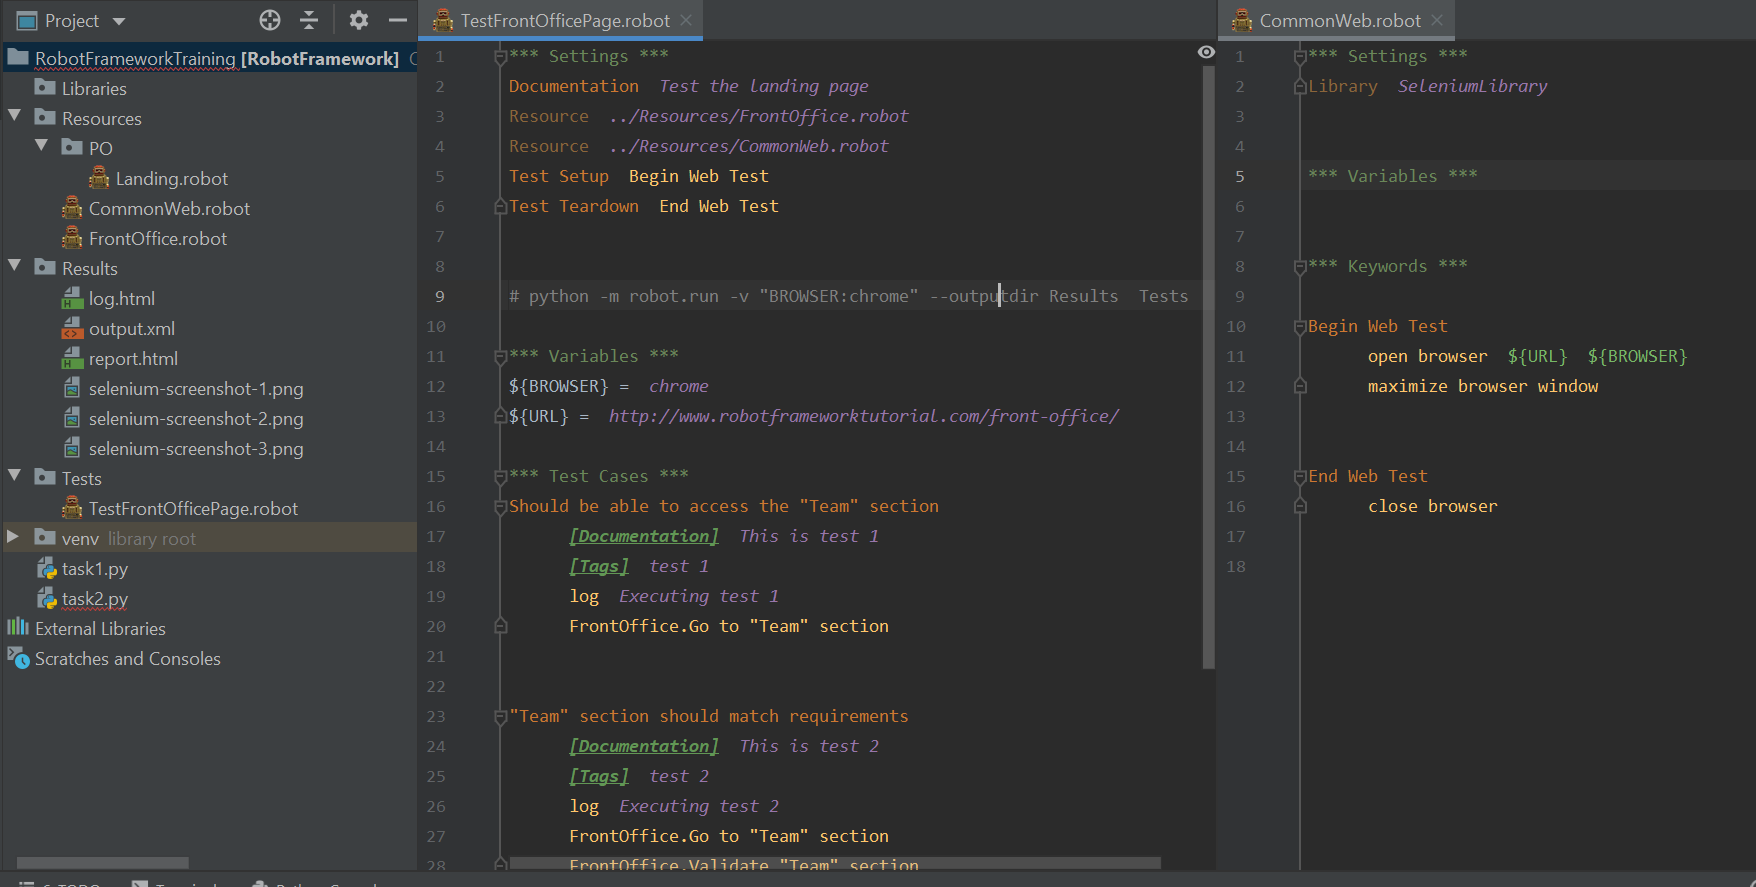

# When Python may be needed

Create your python module with class or with functions. Those will be dynamically recognized by Robot as key words.

You may find it more convenient to use python-coded functions for:

        reading/writing/preparing data sets for the test
        calculations
        db connectors
        adding additional options drivers
        other project specific things

'evaluate' keyword also translates python syntax to robot. This is handy with python one liners







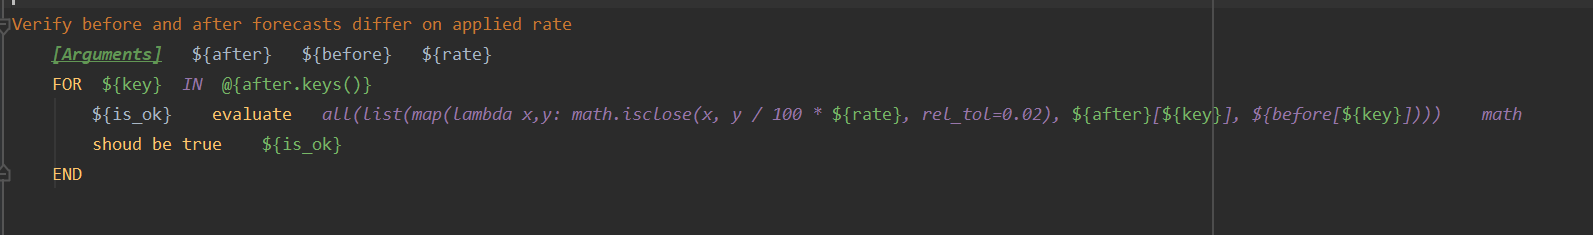

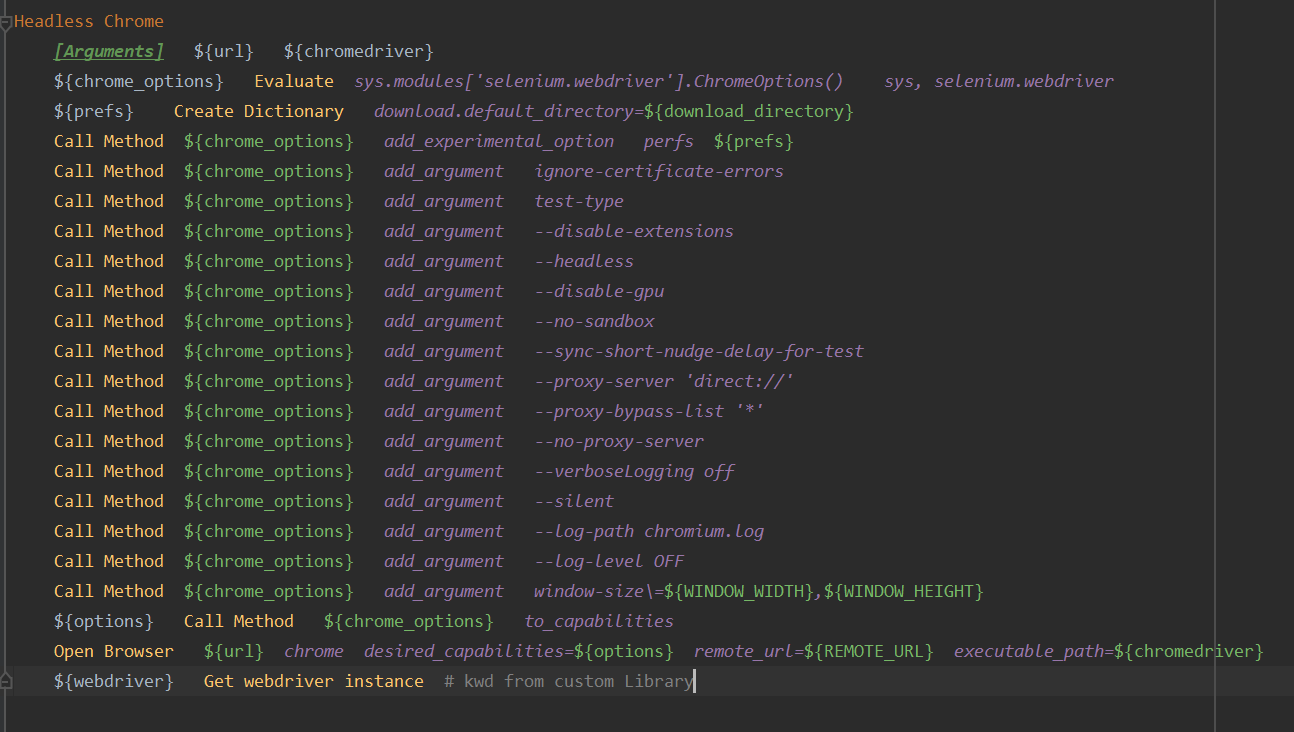

# Other benefits of using RobotFramework

beautifull out-of-the-box reports

support of data driven approach (test templates + 'DataDriven' library)

easy to create extensions (libraries w. kwds)